<a href="https://colab.research.google.com/github/Akshit7103/Akshit7103/blob/main/EDA_Digital_Assessment_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
# Load the dataset from the specified path. Make sure the file path is correct.
file_path = '/content/1000 Sales Records.csv'  # Update path as necessary
df = pd.read_csv(file_path)

# Check the initial dimensions of the dataset to understand its size
print("Dataset Dimensions:", df.shape)

# Display basic information about the dataset including column names, data types, and non-null counts
df.info()

# Display the first few rows of the dataset to get an idea of the data format and values
df.head()


Dataset Dimensions: (1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     263.33     3692591.20  2224085.18    1468506.02  
1      90.93      464953.08   274426.74     190526.34  
2     159.42      387259.76   241840.14     145419.62  
3     117.11      683335.40   389039.42     294295.98  
4       6.92       91853.85    68127.40      23726.45

In [5]:
# 2. Identify and Handle Missing Values
# Check for missing values in each column of the dataset
print("Missing Values:\n", df.isnull().sum())

# If there are missing values, consider handling them.
# Here are two common methods (uncomment if necessary):
# df = df.fillna(method='ffill')  # Forward fill to handle missing values
# df = df.dropna()  # Drop rows with any missing values


Missing Values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [6]:
# 3. Data Cleaning - Removing Duplicate Rows
# Check for duplicate rows to avoid redundant data
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicate rows if any were found
df = df.drop_duplicates()
print("Dataset Dimensions after removing duplicates:", df.shape)


Number of duplicate rows: 0
Dataset Dimensions after removing duplicates: (1000, 14)


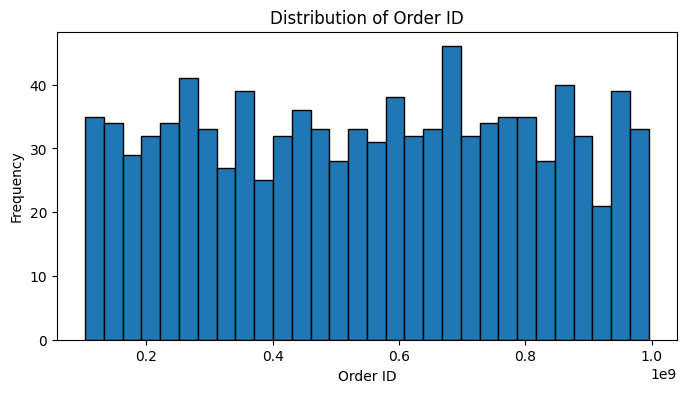

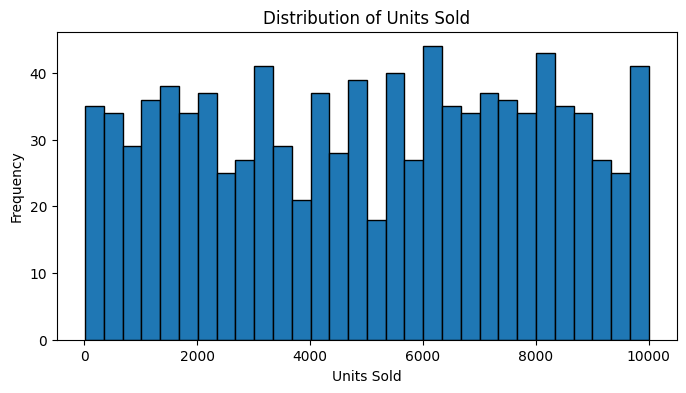

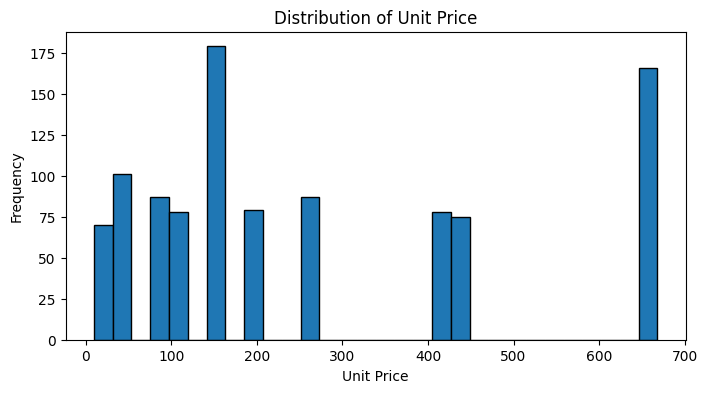

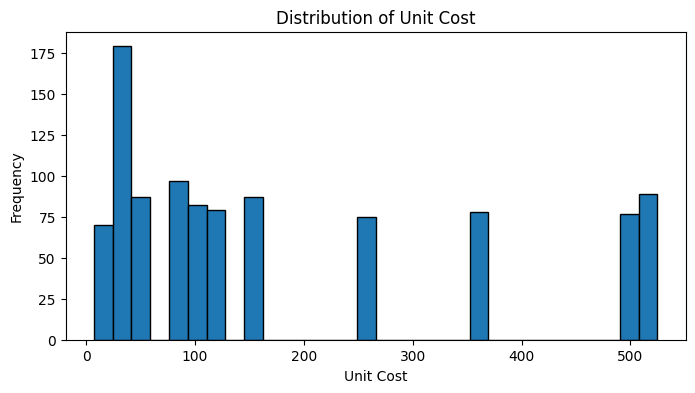

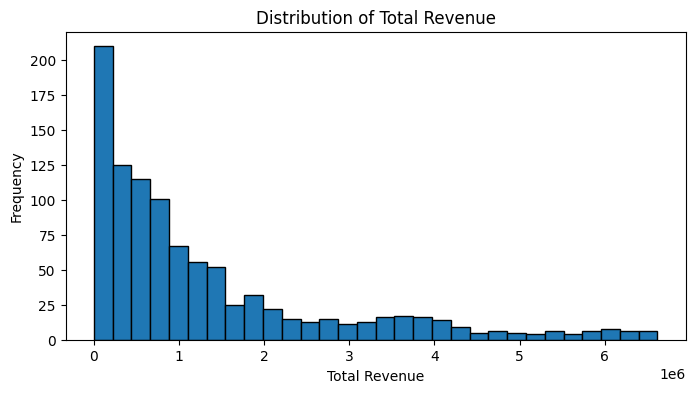

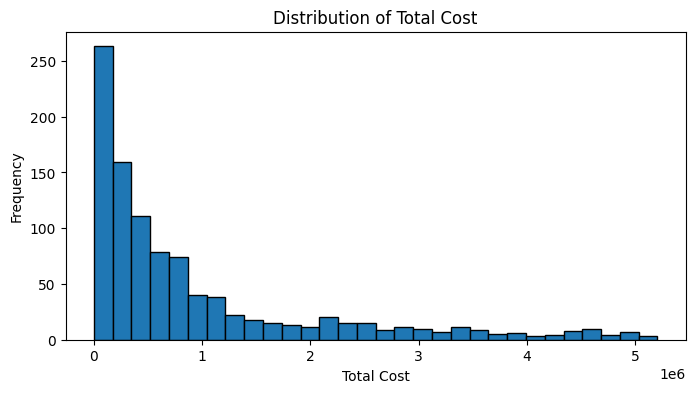

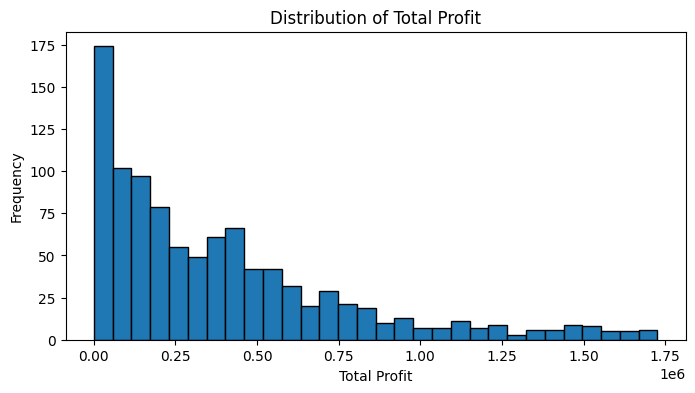

In [7]:
# 4. Univariate Analysis - Distribution of Individual Variables
# Plot histograms for each numerical column to visualize data distributions

# Select only numerical columns for univariate analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # Observations can be noted here, for example:
    # - Identify skewness in certain columns
    # - Check for any outliers visually


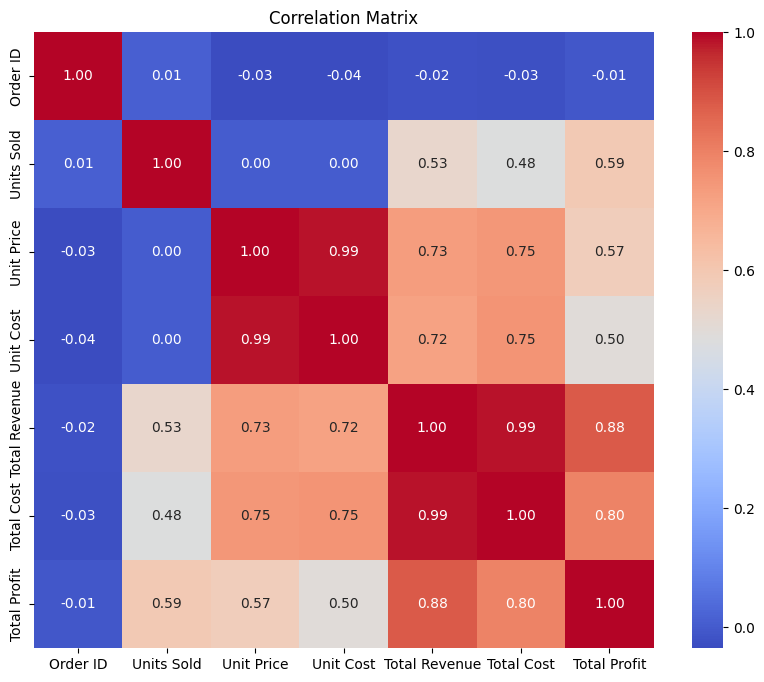

In [8]:
# 5. Bivariate Analysis - Correlation Matrix and Scatter Plot

# 5a. Correlation Matrix
# A correlation matrix shows relationships between numerical variables.
# Values close to 1 or -1 indicate strong relationships.

# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observations:
# - High positive correlation values indicate a direct relationship between variables.
# - High negative correlation values indicate an inverse relationship.
# - Weak or zero correlation suggests no clear relationship.


Column Names: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


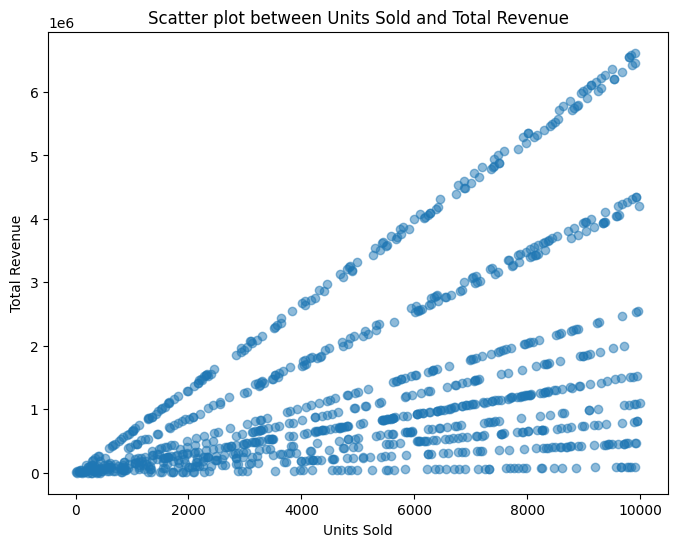

In [9]:
# 5b. Scatter Plot
# Scatter plots are useful to observe relationships between two specific variables.
# Replace 'Units Sold' and 'Total Revenue' with actual column names from your dataset.

# Check the column names in the dataset to decide which columns to plot
print("Column Names:", df.columns)

# Example scatter plot (replace 'Units Sold' and 'Total Revenue' with actual columns you choose to analyze)
plt.figure(figsize=(8, 6))
plt.scatter(df['Units Sold'], df['Total Revenue'], alpha=0.5)  # Replace columns as necessary
plt.title('Scatter plot between Units Sold and Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

# Observations:
# - Look for linear or non-linear patterns between the two variables.
# - Observe any clusters, outliers, or trends in the data.


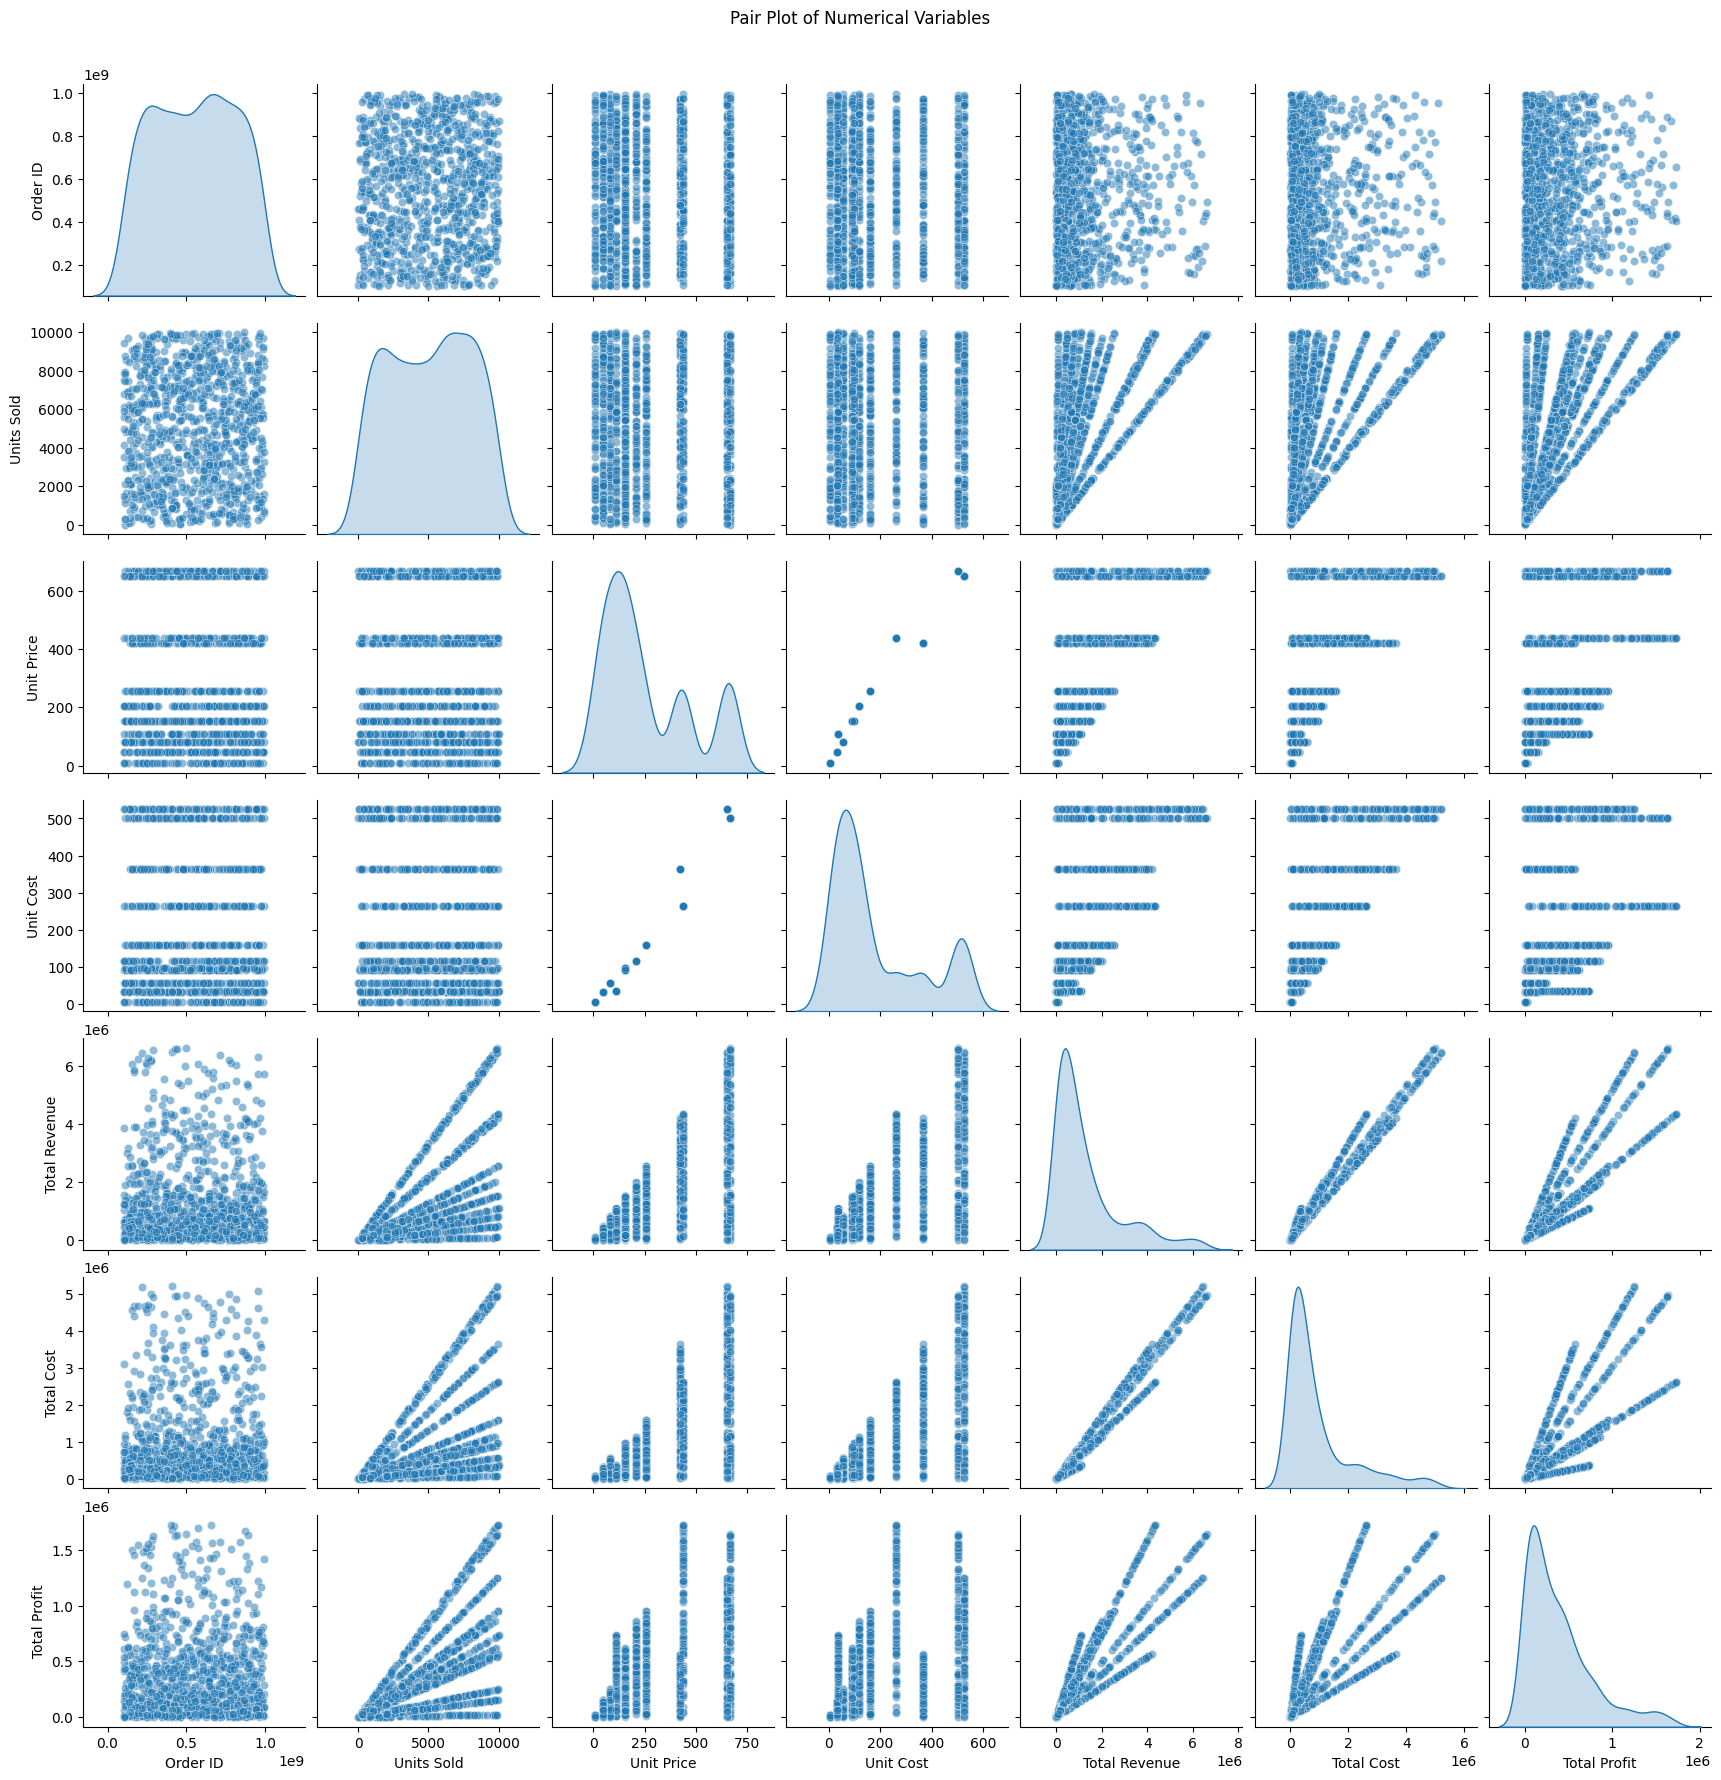

In [10]:
# 6. Multivariate Analysis - Pair Plot
# A pair plot displays relationships across multiple variables.
# It allows us to see scatter plots for pairs of variables and distributions for individual variables on the diagonal.

# Using only numerical columns for the pair plot to avoid errors
sns.pairplot(numerical_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Observations:
# - Look for relationships and patterns among multiple variables.
# - Pair plots can help identify clusters, trends, and outliers across multiple dimensions.


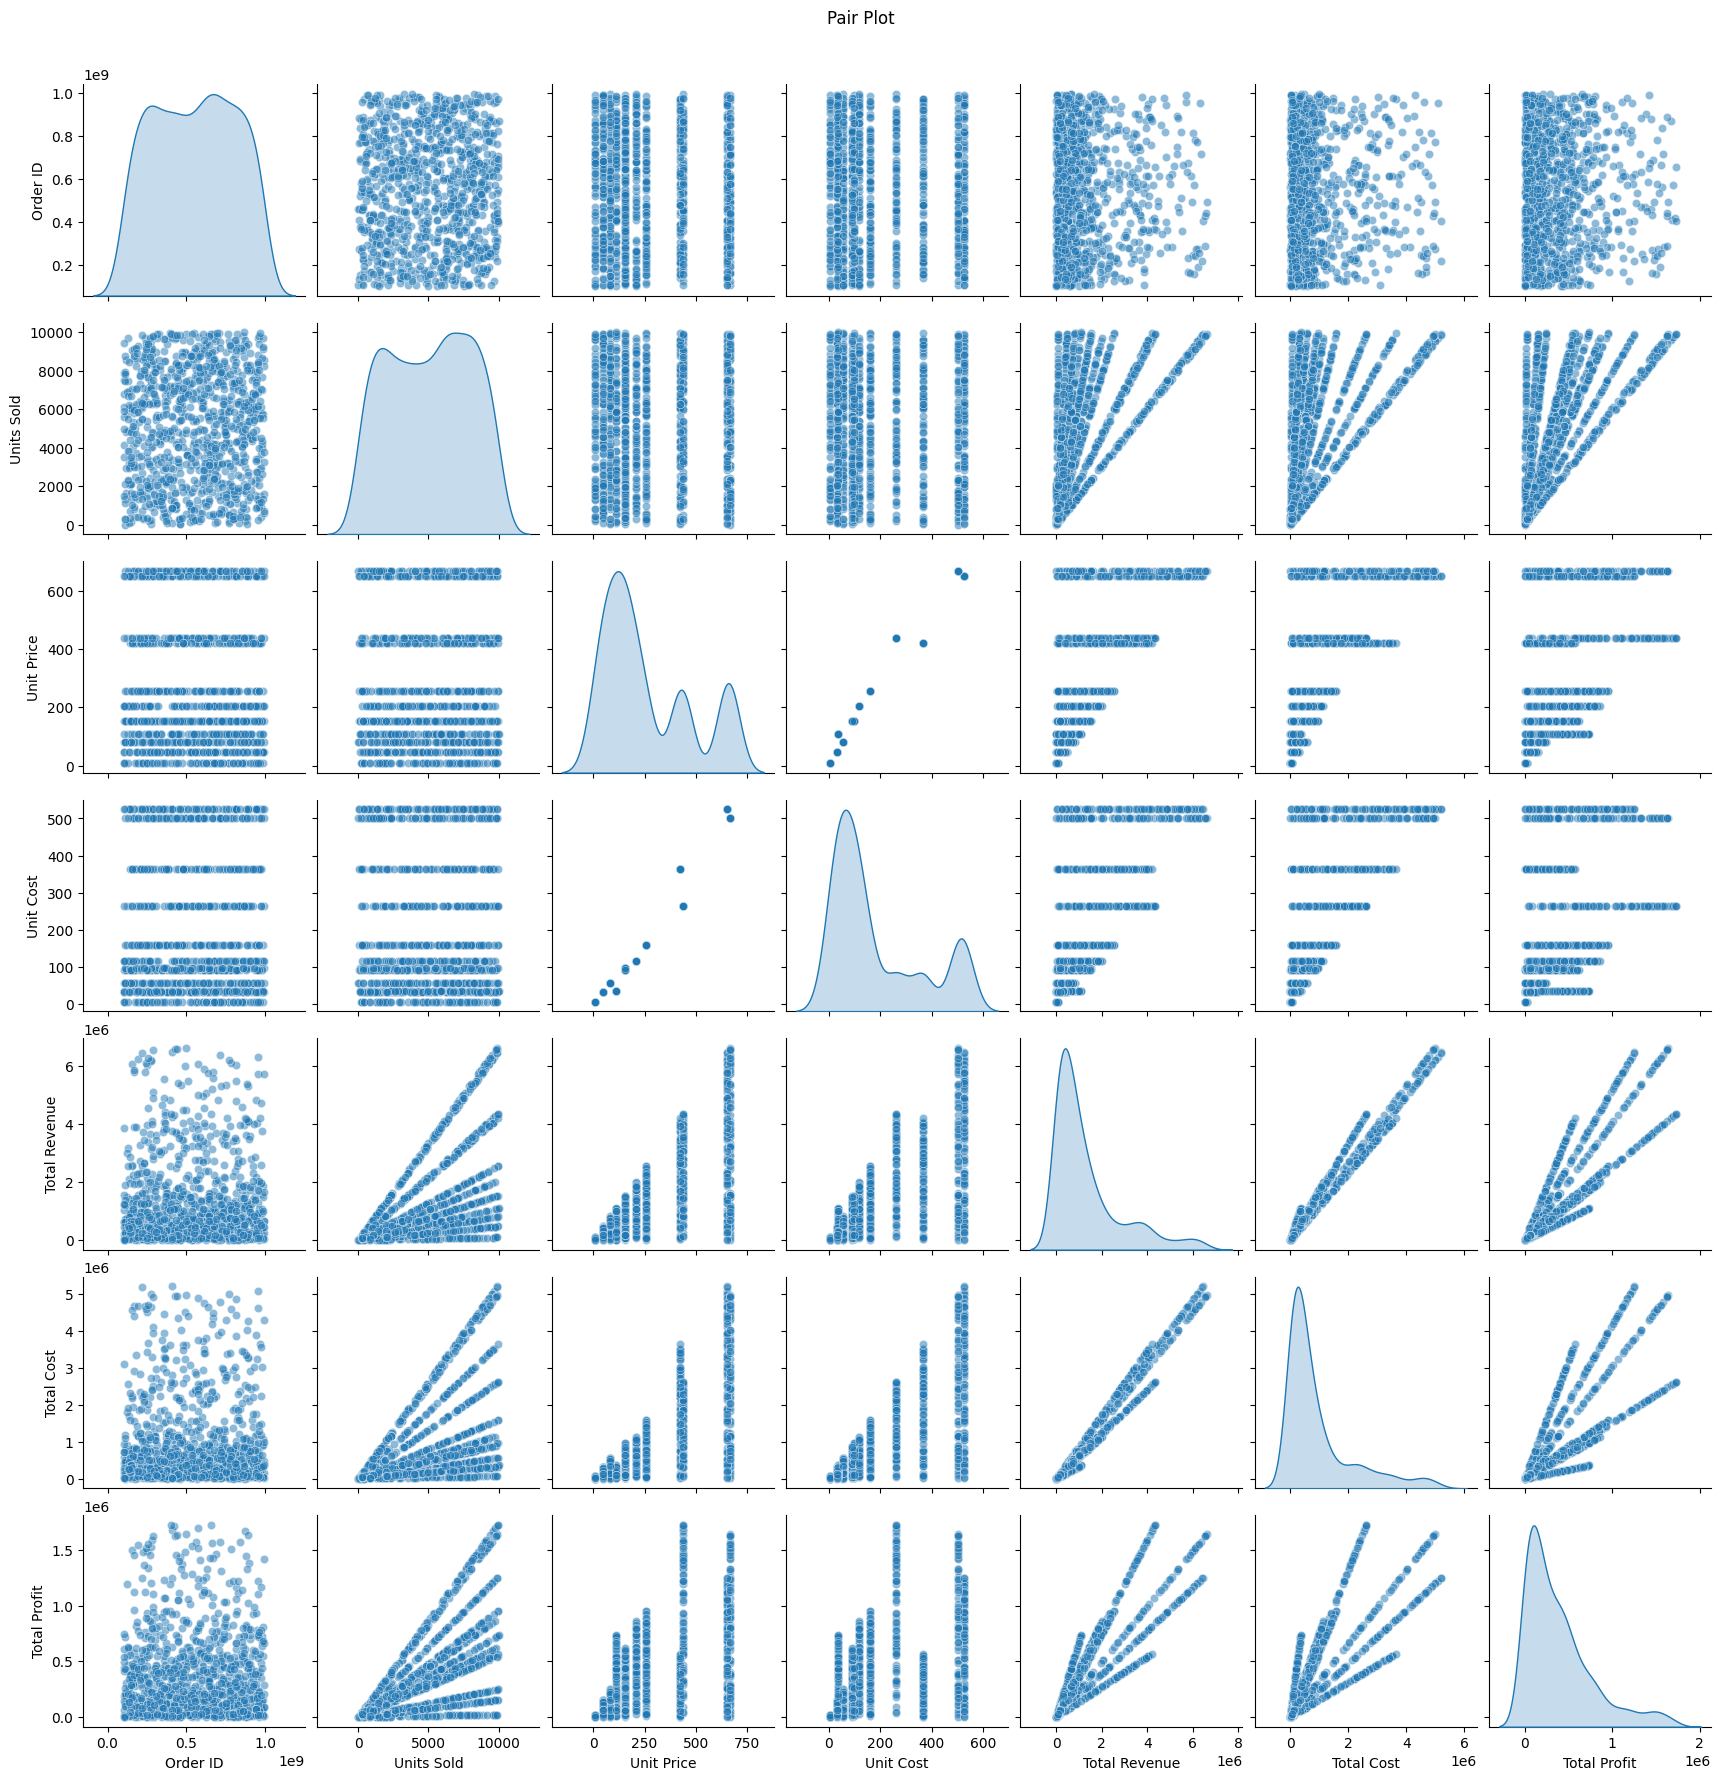

In [11]:
# Pair plot to explore relationships between multiple numerical variables
sns.pairplot(numerical_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot', y=1.02)
plt.show()


In [12]:
# Example of Measurement Scales in the dataset
nominal_example = df['Region'].unique()  # Example of nominal data (no inherent order)
ordinal_example = sorted(df['Order Priority'].unique())  # Example of ordinal data (low, medium, high)
interval_example = "No Interval Scale example in this dataset."
ratio_example = "Numerical columns like 'Units Sold' or 'Total Revenue' are ratio scales."
print("Nominal:", nominal_example)
print("Ordinal:", ordinal_example)
print("Interval:", interval_example)
print("Ratio:", ratio_example)


Nominal: ['Middle East and North Africa' 'North America' 'Asia'
 'Sub-Saharan Africa' 'Europe' 'Central America and the Caribbean'
 'Australia and Oceania']
Ordinal: ['C', 'H', 'L', 'M']
Interval: No Interval Scale example in this dataset.
Ratio: Numerical columns like 'Units Sold' or 'Total Revenue' are ratio scales.


In [13]:
# Replace a value in a specific column (e.g., replacing "Offline" with "In-Store" in 'Sales Channel')
df['Sales Channel'] = df['Sales Channel'].replace({'Offline': 'In-Store'})


In [14]:
# Binning 'Unit Price' into categories
bins = [0, 100, 300, 500]  # Define bin edges
labels = ['Low', 'Medium', 'High']  # Define bin labels
df['Unit Price Category'] = pd.cut(df['Unit Price'], bins=bins, labels=labels)


In [15]:
# Example: Handle missing data using imputation
from sklearn.impute import SimpleImputer

# Assuming 'Units Sold' has missing values
imputer = SimpleImputer(strategy='mean')  # Use Maximum Likelihood Estimation (mean imputation)
df['Units Sold'] = imputer.fit_transform(df[['Units Sold']])


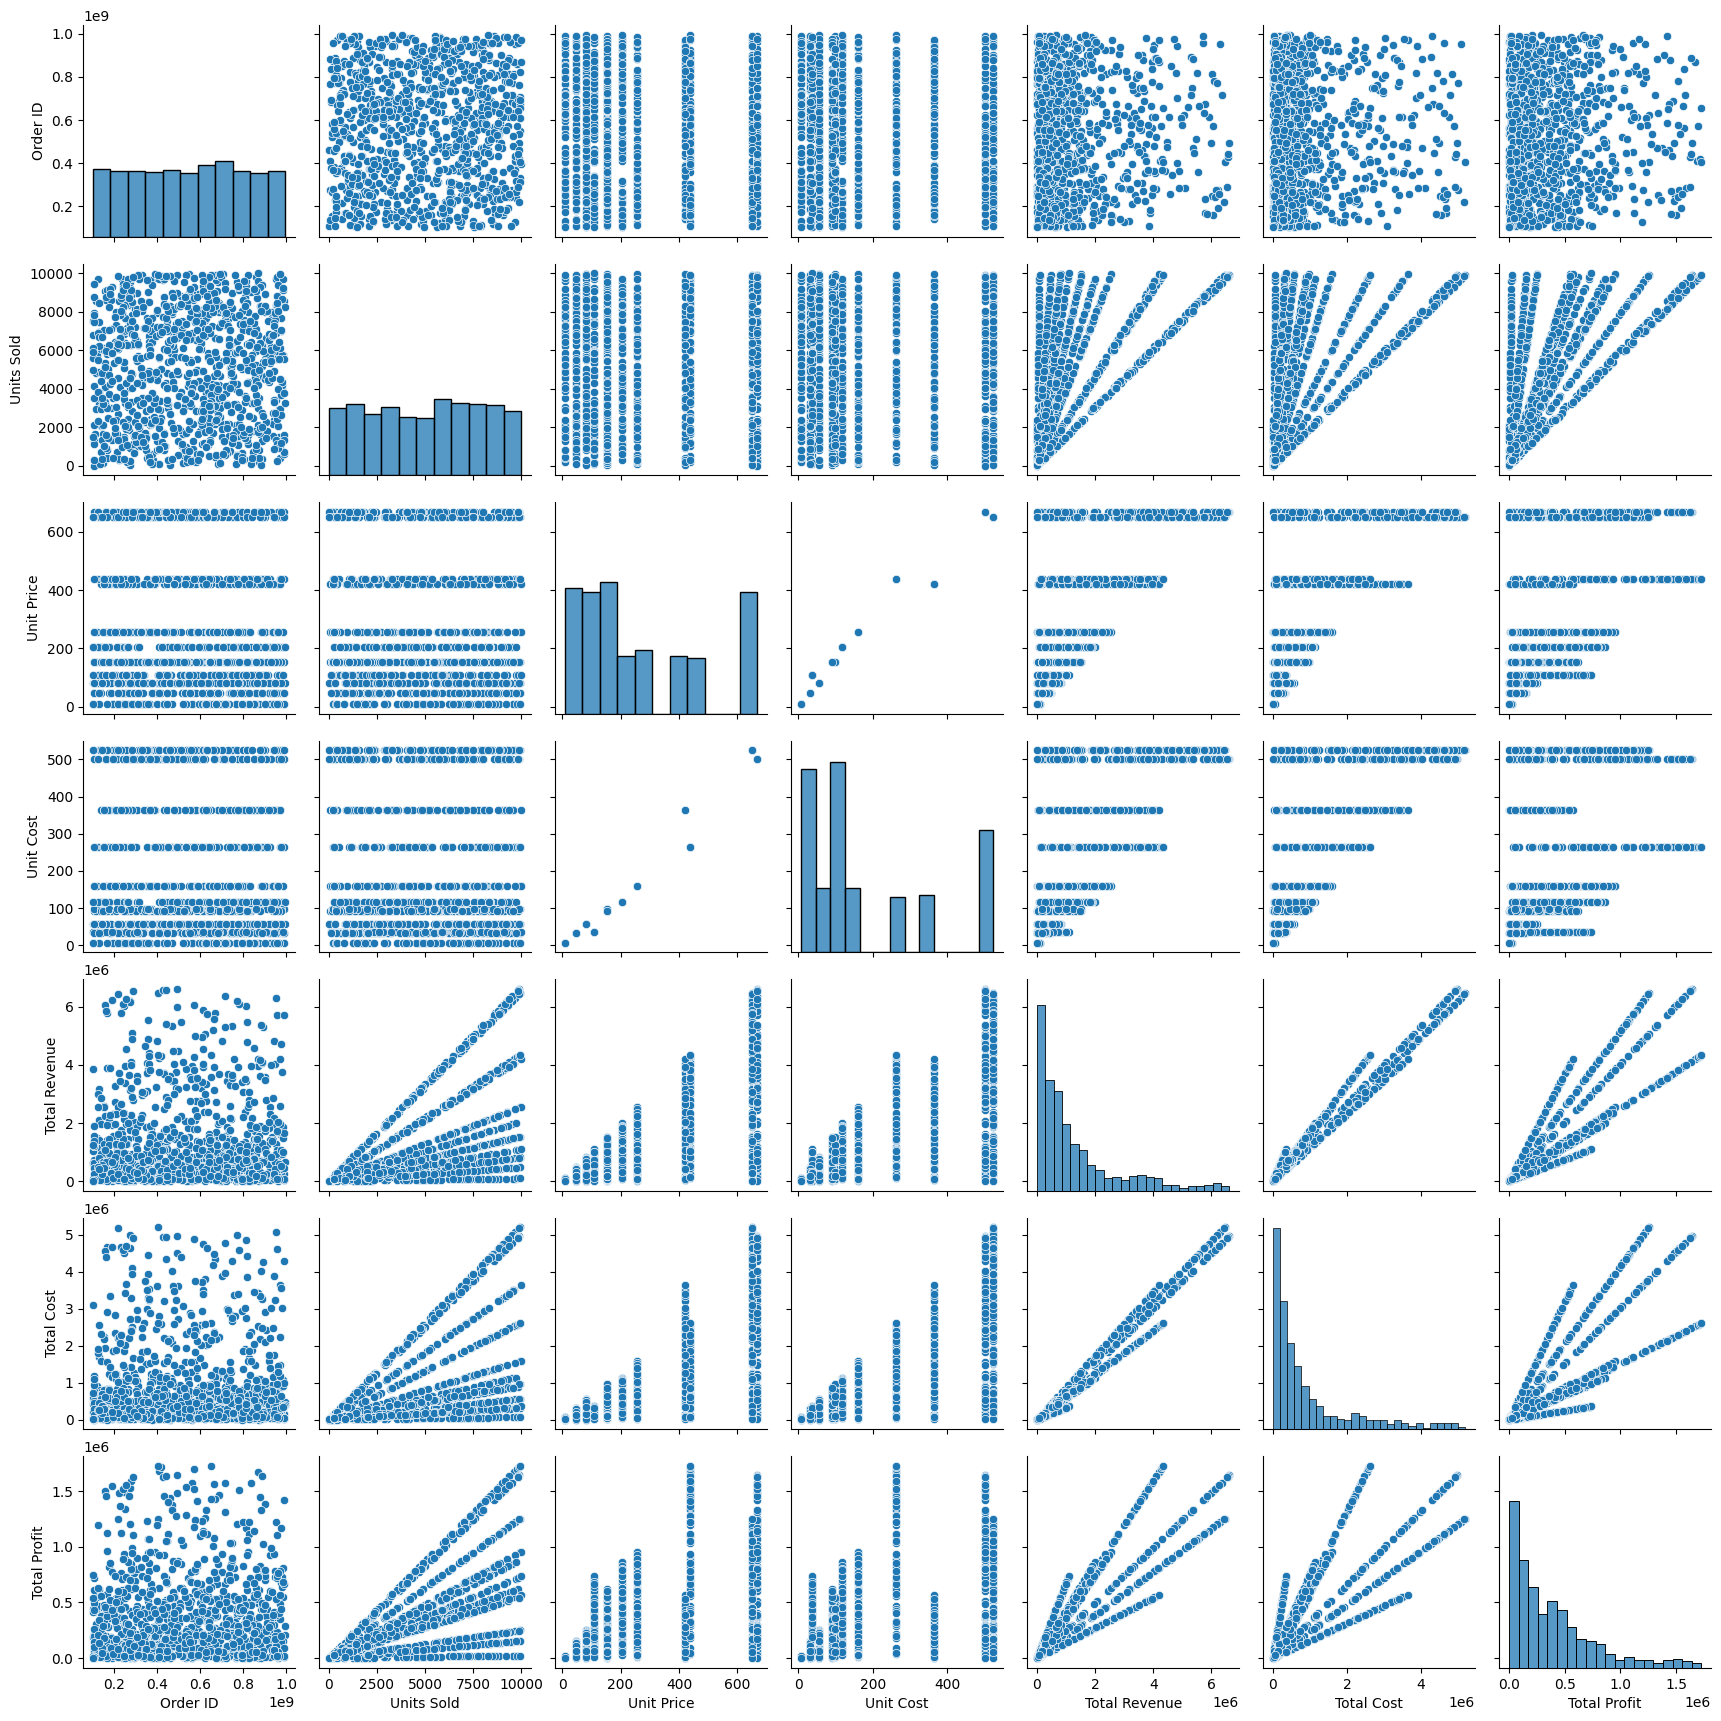

In [16]:
# Pairplot for multivariate relationships
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


<ipython-input-17-76e7c0fe3ecd>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Units Sold'].resample('M').sum()


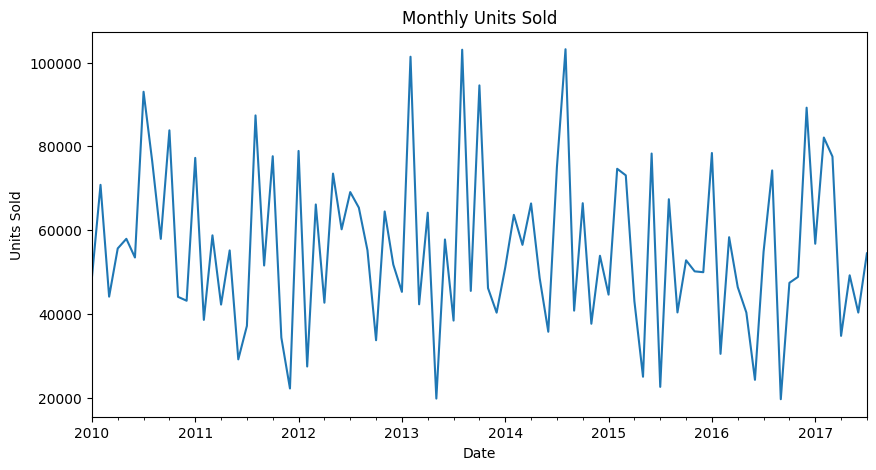

In [17]:
# Assuming 'Order Date' is the time variable
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime
df.set_index('Order Date', inplace=True)  # Set as index for time series analysis

# Grouping and resampling (e.g., monthly sales)
monthly_sales = df['Units Sold'].resample('M').sum()

# Plotting time series trends
monthly_sales.plot(title='Monthly Units Sold', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()


In [18]:
# Cross-tabulation between 'Region' and 'Sales Channel'
contingency_table = pd.crosstab(df['Region'], df['Sales Channel'])
print(contingency_table)


Sales Channel                      In-Store  Online
Region                                             
Asia                                     69      67
Australia and Oceania                    47      32
Central America and the Caribbean        61      38
Europe                                  135     132
Middle East and North Africa             65      73
North America                             8      11
Sub-Saharan Africa                      135     127


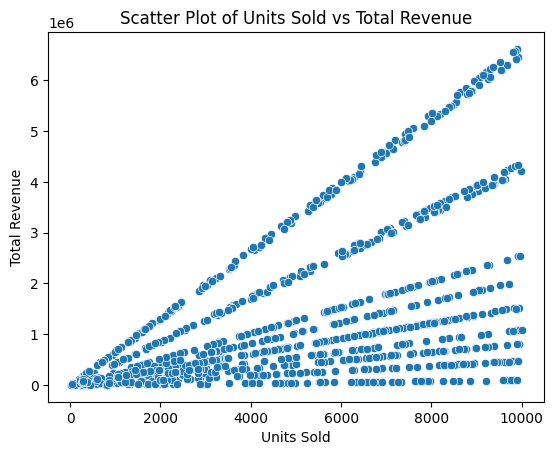

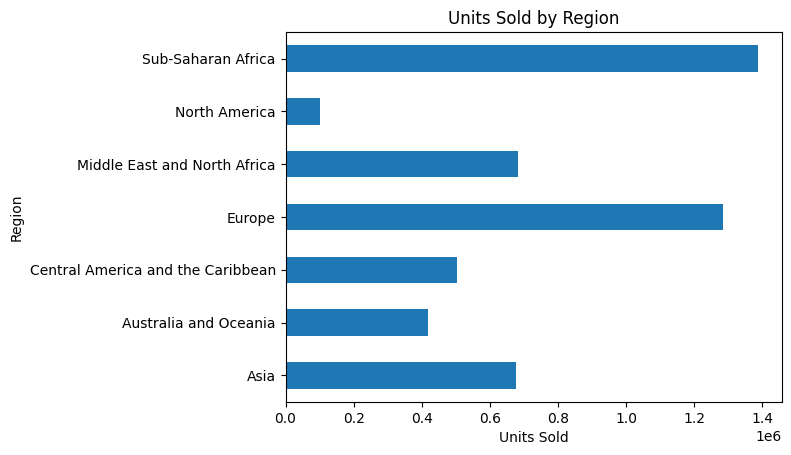

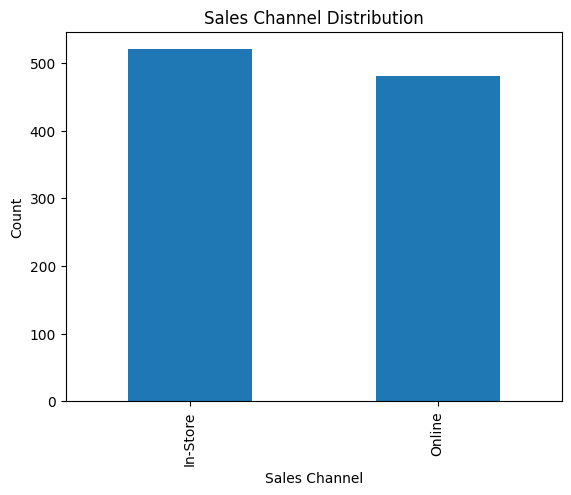

In [19]:
# Scatter plot
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Scatter Plot of Units Sold vs Total Revenue')
plt.show()

# Dot chart (Bar plot alternative)
df.groupby('Region')['Units Sold'].sum().plot(kind='barh', title='Units Sold by Region')
plt.xlabel('Units Sold')
plt.show()

# Bar plot
df['Sales Channel'].value_counts().plot(kind='bar', title='Sales Channel Distribution')
plt.ylabel('Count')
plt.show()


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
X = df[['Units Sold', 'Unit Price', 'Total Revenue']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [21]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


In [22]:
from sklearn.manifold import TSNE

# Apply t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE components to the dataframe
df['tSNE1'] = X_tsne[:, 0]
df['tSNE2'] = X_tsne[:, 1]


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
X = df[['Units Sold', 'Unit Price']]  # Features
y = df['Total Revenue']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 421199361950.92487
